In [2]:
#Der importeres nødvendige pakker:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, fftfreq
import sympy as sp
import pandas as pd

In [3]:
#Dataet hentes
Rådata = np.genfromtxt('13-month smoothed monthly total sunspot number 1-1749 to now.csv', delimiter=';')

#År og solpletantal hentes, hvor de yderste datapunkter er fjernet, da disse ikke giver noget betydningsfuldt endnu:
Dato_brøkdel = Rådata[6:-6,2]
Monthly_smoothed_sunspot_number = Rådata[6:-6,3]
std = Rådata[6:-6,4]
N = Rådata[6:-6,5]

#Minimum
Proxy_minimum_dato = np.array([1755+2/13 , 1766+6/13 , 1775+6/13 , 1784+9/13 , 1798+4/13 , 1810+7/13 , 1823+5/13 , 1833+11/13 , 1843+7/13, 1855+12/13,
                    1867+3/13 , 1878+12/13 , 1890+3/13 , 1902+1/13 , 1913+7/13 , 1923+8/13 , 1933+9/13 , 1944+2/13 , 1954+4/13 , 1964+10/12,
                    1976+3/13 , 1986+9/13 , 1996+8/13 , 2008+12/13 , 2019+12/13])

-25.122030207399064 0.0630140720041523 -24.73213885953739 81.4346399001152


(1818.0, 2037.238)

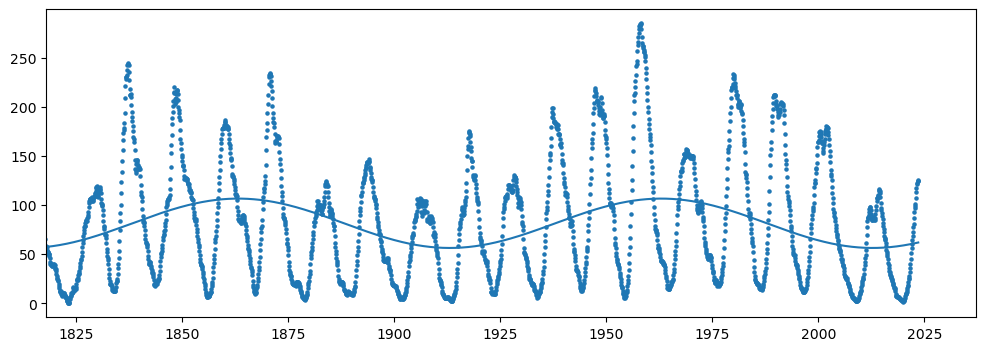

In [10]:
#1
def sin1(x,a,b,c,d):
    return a * np.sin( x * b + c ) + d
Var1 , Cov1 = curve_fit(sin1 , Dato_brøkdel , Monthly_smoothed_sunspot_number , p0=[300,1/20,1,1])

xx = np.linspace(Dato_brøkdel[0] , Dato_brøkdel[-1] , len(Dato_brøkdel))
yy = sin1(xx , *Var1)


plt.figure(figsize=(12,4))
plt.scatter(Dato_brøkdel , Monthly_smoothed_sunspot_number , s=5)
plt.plot(xx , yy)
print(*Var1)
plt.xlim(1818)

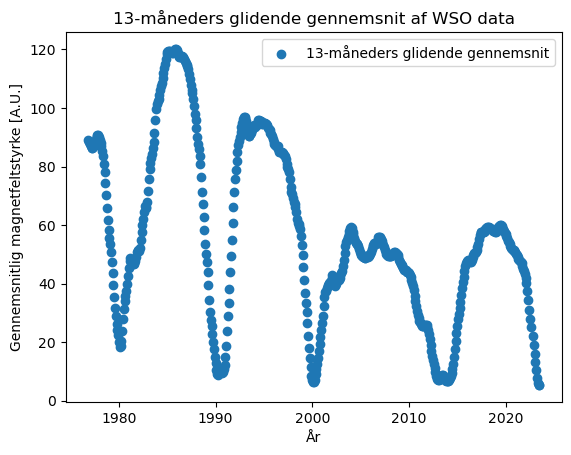

1976.8360711841208


In [11]:
loc = r"C:\Users\chris\OneDrive\Uni\Data og projekt\Solpletter_projekt\Magnus carlsen\data\WSO_smoothed.csv"


column_names = ['Date', 'Magnetic_field','Usikkerheder']
wso_smoothed_data = pd.read_csv(loc, names=column_names, delimiter=',', skiprows=1)

Dato_m = wso_smoothed_data['Date'].values.astype(float)
Mag = wso_smoothed_data['Magnetic_field'].values.astype(float)
Usikker_mag = wso_smoothed_data['Usikkerheder'].values.astype(float)



# for x in Proxy_minimum_dato[-5:]:
#     plt.axvline(x, color='black', linestyle='dashed')

# Plot
#plt.scatter(Dato_brøkdel[2600:] , Monthly_smoothed_sunspot_number[2600:])
plt.scatter(Dato_m, Mag, label='13-måneders glidende gennemsnit')
plt.xlabel('År')
plt.ylabel('Gennemsnitlig magnetfeltstyrke [A.U.]')
plt.title('13-måneders glidende gennemsnit af WSO data')
plt.legend()
plt.show()
print(Dato_m[0])


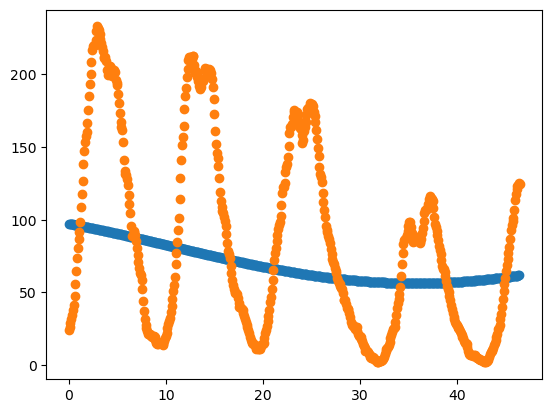

In [6]:
dato_ss = Dato_brøkdel[ -len(Dato_m) : ] - Dato_brøkdel[ -len(Dato_m) ]
Month   = Monthly_smoothed_sunspot_number[ -len(Dato_m) : ]

xxx = xx[ -len(Dato_m) : np.where(xx == Dato_brøkdel[-1])[0][0] ] - xx[ -len(Dato_m) ]
yyy = yy[ -len(Dato_m) : np.where(xx == Dato_brøkdel[-1])[0][0] ]

plt.scatter(xxx , yyy)
plt.scatter(dato_ss , Month)

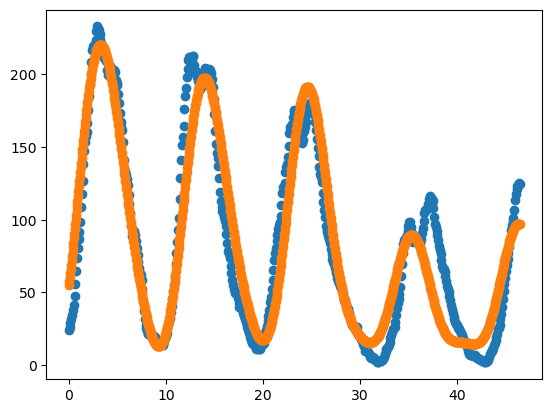

In [7]:
def sin2(x, a2 , b2 , c2 , d2):
    return sin1(x , *Var1) + (a2 * np.sin( x * b2 + c2 ) + d2)
Var2 , Cov2 = curve_fit(sin2 , dato_ss , Month , p0=[300,1/12,1,1])

def sin3(x, a3 , b3 , c3 , d3):
    return sin2(x , *Var2) + (a3 * np.sin( x * b3 + c3 ) + d3)
Var3 , Cov3 = curve_fit(sin3 , dato_ss , Month , p0=[300,1/5,1,1])

def sin4(x, a4 , b4 , c4 , d4):
    return sin3(x , *Var3) * (a4 * np.sin( x * b4 + c4 ) + d4)
Var4 , Cov4 = curve_fit(sin4 , dato_ss , Month , p0=[300,1/2,1,1])

def sin5(x, a5 , b5 , c5 , d5):
    return sin4(x , *Var4) + (a5 * np.sin( x * b5 + c5 ) + d5)
Var5 , Cov5 = curve_fit(sin5 , dato_ss , Month , p0=[300,1,1,1])

def sin6(x, a6 , b6 , c6 , d6):
    return sin5(x , *Var5) * (a6 * np.sin( x * b6 + c6 ) + d6)
Var6 , Cov6 = curve_fit(sin6 , dato_ss , Month , p0=[300,1/20,1,1] , maxfev=20000)



x1 = np.linspace(dato_ss[0] , dato_ss[-1] , 1000)
y = sin6(x1 , *Var6)

plt.scatter(dato_ss , Month)
plt.scatter(x1 , y)


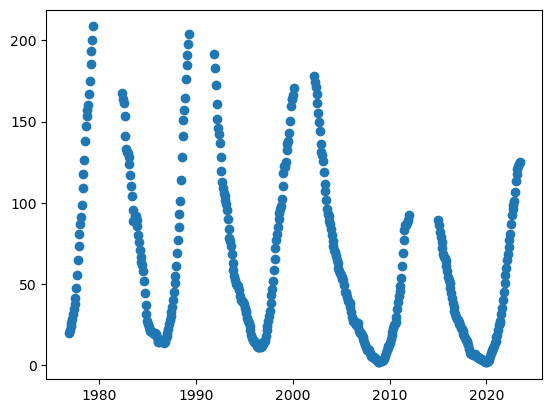

In [8]:
Toppe1 = [[1976.8 , 1979.4] , [1979.4 , 1982.3] , [1989.3 , 1991.8] , [2000.2 , 2002.2] , [2012 , 2015] , [2015 , 2023.5]]

Toppe = [[1976.8 , 1979.4] , [1982.3 , 1989.3] , [1991.8 , 2000.2] , [2002.2 , 2012] , [2015 , 2023.5]]

T_x = np.array([])
T_y = np.array([])

for n in range(len(Toppe)):
    Maske=(Toppe[n][0] < Dato_brøkdel) & (Dato_brøkdel < Toppe[n][1])
    x = Dato_brøkdel[Maske]
    y = Monthly_smoothed_sunspot_number[Maske]
    T_x = np.append(T_x , x)
    T_y = np.append(T_y , y)

plt.scatter(T_x , T_y)


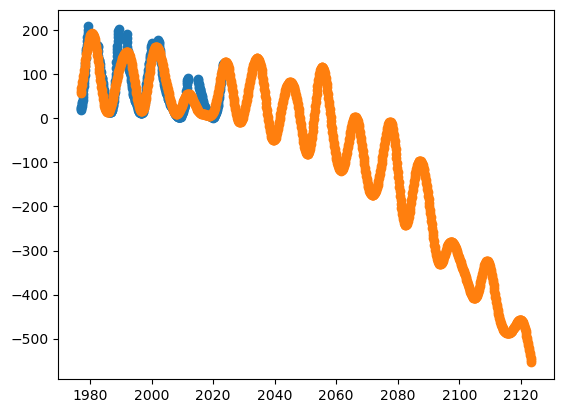

In [9]:
def sin2(x, a2 , b2 , c2 , d2):
    return sin1(x , *Var1) + (a2 * np.sin( x * b2 + c2 ) + d2)
Var2 , Cov2 = curve_fit(sin2 , T_x , T_y , p0=[300,1/12,1,1])

def sin3(x, a3 , b3 , c3 , d3):
    return sin2(x , *Var2) + (a3 * np.sin( x * b3 + c3 ) + d3)
Var3 , Cov3 = curve_fit(sin3 , T_x , T_y , p0=[300,1/5,1,1])

def sin4(x, a4 , b4 , c4 , d4):
    return sin3(x , *Var3) * (a4 * np.sin( x * b4 + c4 ) + d4)
Var4 , Cov4 = curve_fit(sin4 , T_x , T_y , p0=[300,1/2,1,1])

def sin5(x, a5 , b5 , c5 , d5):
    return sin4(x , *Var4) + (a5 * np.sin( x * b5 + c5 ) + d5)
Var5 , Cov5 = curve_fit(sin5 , T_x , T_y , p0=[300,1,1,1])

def sin6(x, a6 , b6 , c6 , d6):
    return sin5(x , *Var5) + (a6 * np.sin( x * b6 + c6 ) + d6)
Var6 , Cov6 = curve_fit(sin6 , T_x , T_y , p0=[300,1/20,1,1] , maxfev=20000)



x1 = np.linspace(T_x[0] , T_x[-1] + 100, 1000)
y = sin6(x1 , *Var6)

plt.scatter(T_x , T_y)
plt.scatter(x1 , y)